In [1]:
from dataloader import data_info, train_test_split_data, data_visuals
from classifiers import Classifier
from evaluation import evaluate
from data_split_examine import data_split_examine, visualise_split

### Data Visualisation

In [2]:
""" Viewing the dataset"""
data_info()


First 5 rows of datasets: 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1



Last 5 rows of datasets: 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
14971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,2
14972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,2
14973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,2
14974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,2
14975,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,2



Information of each column: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14976 non-null  float64
 1   V2      14976 non-null  float64
 2   V3      14976 non-null  float64
 3   V4      14976 non-null  float64
 4   V5      14976 non-null  float64
 5   V6      14976 non-null  float64
 6   V7      14976 non-null  float64
 7   V8      14976 non-null  float64
 8   V9      14976 non-null  float64
 9   V10     14976 non-null  float64
 10  V11     14976 non-null  float64
 11  V12     14976 non-null  float64
 12  V13     14976 non-null  float64
 13  V14     14976 non-null  float64
 14  Class   14976 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


None


Checking for null values: 

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
Class    0
dtype: int64


In [2]:
""" checking the values of Class column """
data_visuals

<function dataloader.data_visuals()>

In [4]:
""" Splitting data into training and testing sets"""
x_train, x_test, y_train, y_test = train_test_split_data(0.40)

### Training various Classifier Models

Accuracy :  0.628776498080454
Precision:  0.6769690927218345
Recall:  0.6193371845545759
F1 score :  0.6468720228644014
Precision vs Recall Curve
Confusion Matrix


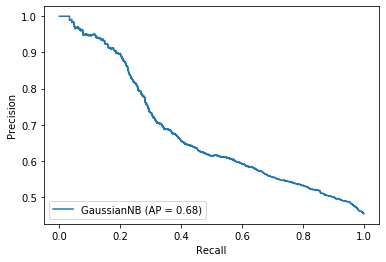

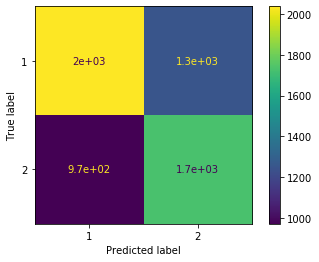

In [5]:
""" using Gaussian Bayes """
model = Classifier() 
classifier = model.Gaussian(x_train,y_train)
model.evaluation(classifier,x_test, y_test)

Accuracy :  0.9509263895843766
Precision:  0.9544764795144158
Recall:  0.9562176953481302
F1 score :  0.9553462940461726
Precision vs Recall Curve
Confusion Matrix


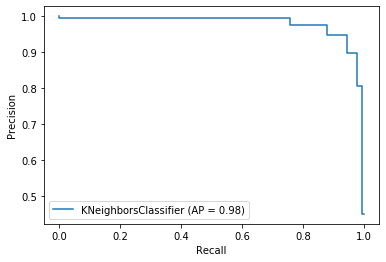

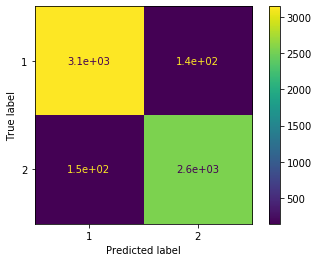

In [6]:
""" K- Neighbours Classifier"""
classifier = model.KNeighbors(x_train,y_train)
model.evaluation(classifier,x_test, y_test)

/home/aditi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.6459689534301453
Precision:  0.6454183266932271
Recall:  0.7880814837336576
F1 score :  0.7096509240246407
Precision vs Recall Curve
Confusion Matrix


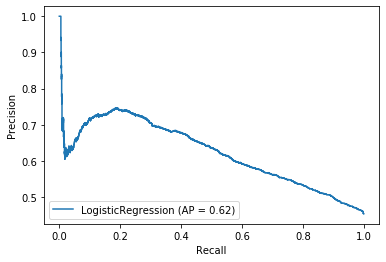

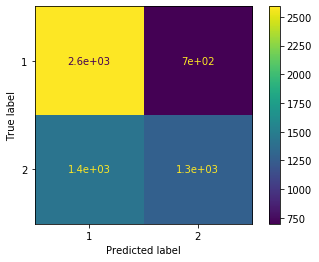

In [7]:
""" Logistic Regression """
classifier = model.Logistic_Reg(x_train,y_train)
model.evaluation(classifier,x_test, y_test)

#### various other models can also be seen and checked

### Examining space between Data Split and Evaluation Metric

In [2]:
""" We will be using K-Neigbors as it gave the highest accuracy """
data_split_examine()

,Training data,Testing Data,Accuracy,Precision,Recall,F1_score
1,100.0,0.0,1.000000,1.000000,1.000000,1.000000
2,95.0,5.0,0.964048,0.973039,0.961259,0.967113
3,90.0,10.0,0.962667,0.973366,0.959427,0.966346
4,85.0,15.0,0.961744,0.976019,0.956147,0.965981
5,80.0,20.0,0.961962,0.973684,0.958775,0.966172
6,75.0,25.0,0.957822,0.967773,0.956728,0.962219
7,70.0,30.0,0.954616,0.962051,0.955876,0.958954
8,65.0,35.0,0.955568,0.961418,0.957756,0.959584
9,60.0,40.0,0.950935,0.954490,0.956231,0.955360
10,55.0,45.0,0.950156,0.952215,0.957355,0.954778


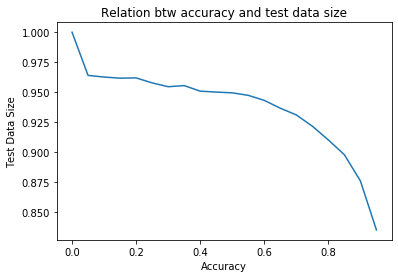

In [3]:
""" Visualising the realtion between accuracy and split %"""
visualise_split()

#### the graph shows an inverse realtion btw the two entities